Topic: Data Visualization
Note:
-	Use the dataset ‘Test_data.csv’ for data visualization.
-	You may need to impute missing cases.
-	Write your comment on every chart/graph


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
#reading data
data = pd.read_csv('Test_data.csv')
df = data.copy()
df.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
0,1997,Andorra,NaN,NaN,64147.0,18405.320100,Europe & Central Asia,High income
1,1976,Andorra,NaN,NaN,31781.0,7151.570481,Europe & Central Asia,High income
2,1984,Andorra,NaN,NaN,42704.0,7729.324115,Europe & Central Asia,High income
3,2003,Andorra,NaN,NaN,74783.0,31742.992580,Europe & Central Asia,High income
4,1970,Andorra,NaN,NaN,24279.0,3238.091462,Europe & Central Asia,High income


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11321 entries, 0 to 11320
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        11321 non-null  int64  
 1   country.name                11321 non-null  object 
 2   life.expectancy             9853 non-null   float64
 3   fertility.rate              9874 non-null   float64
 4   population                  11048 non-null  float64
 5   GDP.per.capita.Current.USD  8233 non-null   float64
 6   region.value                11321 non-null  object 
 7   incomeLevel.value           11321 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 707.7+ KB


In [4]:
df.isnull().sum()

year                             0
country.name                     0
life.expectancy               1468
fertility.rate                1447
population                     273
GDP.per.capita.Current.USD    3088
region.value                     0
incomeLevel.value                0
dtype: int64

In [5]:
df.groupby(['region.value','incomeLevel.value']).mean()['life.expectancy']

region.value                incomeLevel.value  
East Asia & Pacific         High income            72.841414
                            Low income             64.173621
                            Lower middle income    58.372733
                            Upper middle income    66.422056
Europe & Central Asia       High income            74.291974
                            Lower middle income    66.272488
                            Upper middle income    68.805284
Latin America & Caribbean   High income            71.021122
                            Low income             53.112995
                            Lower middle income    60.249441
                            Upper middle income    68.022319
Middle East & North Africa  High income            70.033624
                            Lower middle income    61.460214
                            Upper middle income    64.585678
North America               High income            76.762464
South Asia                  Low incom

In [62]:
def null(col1,col2,null_col): 
    '''Function to fill null values with mean based on another columns
    col1 ,col2 = column dependent on null_col
       null_col = column having null values'''    
    null_index = np.where(df[null_col].isnull())[0]
    for i in null_index:
        groupby_col1_col2 = df.groupby([col1,col2]).mean()[null_col]
        mean_value = groupby_col1_col2[df[col1].iloc[i],df[col2].iloc[i]]
        df.loc[i,null_col] = mean_value
        
    return df


In [63]:

# Code to Measure time taken by program to execute.
import time
  
# store starting time
begin = time.time()

null('region.value','incomeLevel.value','life.expectancy')
null('region.value','incomeLevel.value','fertility.rate')
null('region.value','incomeLevel.value','population')
null('region.value','incomeLevel.value','GDP.per.capita.Current.USD')

end = time.time()
print(end - begin)

32.41791081428528


In [6]:
def null(col1,col2,null_col): 
    '''Function to fill null values with mean based on another columns
    col1 ,col2 = column dependent on null_col
       null_col = column having null values'''
    groupby_col1_col2 = df.groupby([col1,col2]).mean()[null_col]
    l = []
    for i,j in groupby_col1_col2.index:
            df1 = df[df[col1] == i]
            df2 = df1[df1[col2] == j]
            series = df2[null_col]
            series.fillna(value = groupby_col1_col2[i][j],inplace = True)
            l.append(series)
    df3 = pd.concat(l[0:])
    df.loc[:,null_col] = df3.sort_index()
    
    return df


In [7]:

# Code to Measure time taken by program to execute.
import time
  
# store starting time
begin = time.time()

null('region.value','incomeLevel.value','life.expectancy')
null('region.value','incomeLevel.value','fertility.rate')
null('region.value','incomeLevel.value','population')
null('region.value','incomeLevel.value','GDP.per.capita.Current.USD')

end = time.time()
print(end - begin)

0.21701669692993164


C:\Users\jaych\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
df.isnull().sum()

year                           0
country.name                   0
life.expectancy                0
fertility.rate                 0
population                     0
GDP.per.capita.Current.USD    57
region.value                   0
incomeLevel.value              0
dtype: int64

In [9]:
df.groupby(['region.value','incomeLevel.value']).describe()['GDP.per.capita.Current.USD']

count          mean  \
region.value               incomeLevel.value                           
East Asia & Pacific        High income           741.0  15543.988618   
                           Low income              0.0           NaN   
                           Lower middle income   741.0   1103.864781   
                           Upper middle income   399.0   2641.700185   
Europe & Central Asia      High income          2052.0  22993.759203   
                           Lower middle income   285.0   1194.444027   
                           Upper middle income   719.0   3321.285297   
Latin America & Caribbean  High income           741.0   8758.949360   
                           Low income             57.0    518.182491   
                           Lower middle income   285.0   1095.498434   
                           Upper middle income  1083.0   2763.486853   
Middle East & North Africa High income           399.0  14954.942419   
                           Lower middle income   285.0   1237.546822   
                           Upper middle income   342.0   3095.044793   
North America              High income           114.0  25777.618224   
South Asia                 Low income            114.0    239.980961   
                           Lower middle income   285.0    599.430742   
                           Upper middle income    57.0   2862.072138   
Sub-Saharan Africa         High income            57.0   5136.517792   
                           Low income           1425.0    308.763070   
                           Lower middle income   684.0    750.869958   
                           Upper middle income   399.0   3363.283536   

                                                         std          min  \
region.value               incomeLevel.value                                
East Asia & Pacific        High income          12465.997751    91.480593   
                           Low income                    NaN          NaN   
                           Lower middle income    753.343456    56.472354   
                           Upper middle income   2355.332934    70.122082   
Europe & Central Asia      High income          20522.427938   360.499299   
                           Lower middle income    714.983559   139.109142   
                           Upper middle income   2026.952540   218.492166   
Latin America & Caribbean  High income           5597.286885   241.550005   
                           Low income             118.969199   249.412139   
                           Lower middle income    892.429579   128.035067   
                           Upper middle income   2460.509220   161.420095   
Middle East & North Africa High income          14099.035148   101.246821   
                           Lower middle income    887.410792   158.893299   
                           Upper middle income   2284.990217   171.209137   
North America              High income          24549.370751  1902.402119   
South Asia                 Low income             169.269512    46.277923   
                           Lower middle income    637.387323    82.540780   
                           Upper middle income   1907.680198   268.277986   
Sub-Saharan Africa         High income           4662.126193   270.279661   
                           Low income             192.674959     0.000000   
                           Lower middle income    690.731974    40.614072   
                           Upper middle income   3390.438607    35.367727   

                                                        25%           50%  \
region.value               incomeLevel.value                                
East Asia & Pacific        High income          6995.155959  15543.988618   
                           Low income                   NaN           NaN   
                           Lower middle income   658.909540   1103.864781   
                           Upper middle income   963.559262   2641.700185   
Europe & 

In [10]:
df.groupby(['incomeLevel.value']).mean()['GDP.per.capita.Current.USD']

incomeLevel.value
High income            18126.248280
Low income               311.329327
Lower middle income      977.672928
Upper middle income     3000.497608
Name: GDP.per.capita.Current.USD, dtype: float64

In [11]:
df_groupby_reg_inc = df.groupby(['region.value','incomeLevel.value']).mean()['GDP.per.capita.Current.USD']
df_groupby_reg_inc

region.value                incomeLevel.value  
East Asia & Pacific         High income            15543.988618
                            Low income                      NaN
                            Lower middle income     1103.864781
                            Upper middle income     2641.700185
Europe & Central Asia       High income            22993.759203
                            Lower middle income     1194.444027
                            Upper middle income     3321.285297
Latin America & Caribbean   High income             8758.949360
                            Low income               518.182491
                            Lower middle income     1095.498434
                            Upper middle income     2763.486853
Middle East & North Africa  High income            14954.942419
                            Lower middle income     1237.546822
                            Upper middle income     3095.044793
North America               High income            25777

In [12]:
p1 = df_groupby_reg_inc['Latin America & Caribbean ','Low income'] / df_groupby_reg_inc['Latin America & Caribbean ','Lower middle income']
print('proprotion of Low and lower middle income in Latin America & Caribbean:-',p1)
p2 = df_groupby_reg_inc['South Asia','Low income'] / df_groupby_reg_inc['South Asia','Lower middle income']
print('proprotion of Low and lower middle income in South Asia   :-',p2)
p3 = df_groupby_reg_inc['Sub-Saharan Africa ','Low income'] / df_groupby_reg_inc['Sub-Saharan Africa ','Lower middle income']
print('proprotion of Low and lower middle income in Sub-Saharan Africa :-',p3)
mean_prop = np.mean([p1,p2,p3])
print('Mean Proportion of Low and lower middle income:-',mean_prop)

proprotion of Low and lower middle income in Latin America & Caribbean:- 0.4730107087294894
proprotion of Low and lower middle income in South Asia   :- 0.40034810473345717
proprotion of Low and lower middle income in Sub-Saharan Africa :- 0.4112071158115141
Mean Proportion of Low and lower middle income:- 0.4281886430914869


In [13]:
to_fill = mean_prop * df_groupby_reg_inc['East Asia & Pacific','Lower middle income']
to_fill

472.6623628376241

In [14]:
df['GDP.per.capita.Current.USD'].fillna(value = to_fill,inplace = True)

In [15]:
df.isnull().sum()

year                          0
country.name                  0
life.expectancy               0
fertility.rate                0
population                    0
GDP.per.capita.Current.USD    0
region.value                  0
incomeLevel.value             0
dtype: int64

In [16]:
df.dropna(inplace = True)

#### 1.	Summarise ‘incomeLevel’ column from the dataset and represent using proper chart.
* a.	Use counts
* b.	Use percentages


In [17]:
df.groupby(['region.value','incomeLevel.value']).mean()['GDP.per.capita.Current.USD']

region.value                incomeLevel.value  
East Asia & Pacific         High income            15543.988618
                            Low income               472.662363
                            Lower middle income     1103.864781
                            Upper middle income     2641.700185
Europe & Central Asia       High income            22993.759203
                            Lower middle income     1194.444027
                            Upper middle income     3321.285297
Latin America & Caribbean   High income             8758.949360
                            Low income               518.182491
                            Lower middle income     1095.498434
                            Upper middle income     2763.486853
Middle East & North Africa  High income            14954.942419
                            Lower middle income     1237.546822
                            Upper middle income     3095.044793
North America               High income            25777

In [18]:
#Data Preparation for chart
pie = df['incomeLevel.value'].value_counts()
pie

High income            4104
Upper middle income    2999
Lower middle income    2565
Low income             1653
Name: incomeLevel.value, dtype: int64

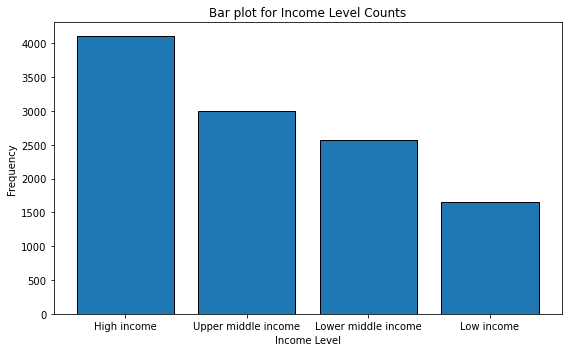

In [19]:
plt.figure(figsize=(8,5))
plt.bar(height = pie.values,x=pie.index,edgecolor='black')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Bar plot for Income Level Counts')
plt.tight_layout()

A lot of people have High Income and few have low income

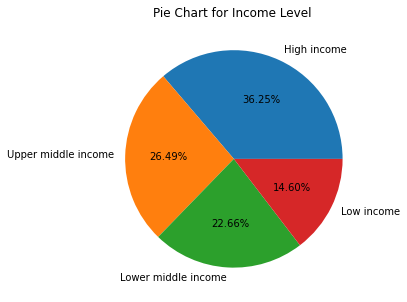

In [20]:
plt.figure(figsize=(5,5))
plt.pie(pie.values,labels=pie.index,autopct='%1.2f%%')
plt.title('Pie Chart for Income Level ')
plt.show()

* 36% people have High Income
* 23% people have low middle income
* 26% people have upper middle income
* 15% people have low income

### 2.	Summarise ‘incomeLevel’ and ‘region’ columns together and represent the summary by proper chart.
* a.	Use counts
* b.	Use ‘region’ wise percentages


In [21]:
df1 = pd.crosstab(df['region.value'],df['incomeLevel.value'])
df1

incomeLevel.value,High income,Low income,Lower middle income,Upper middle income
region.value,,,,
East Asia & Pacific,741,57,741,399
Europe & Central Asia,2052,0,285,719
Latin America & Caribbean,741,57,285,1083
Middle East & North Africa,399,0,285,342
North America,114,0,0,0
South Asia,0,114,285,57
Sub-Saharan Africa,57,1425,684,399


<AxesSubplot:title={'center':'Multiple bar Diagram'}, xlabel='region.value', ylabel='Frequency'>

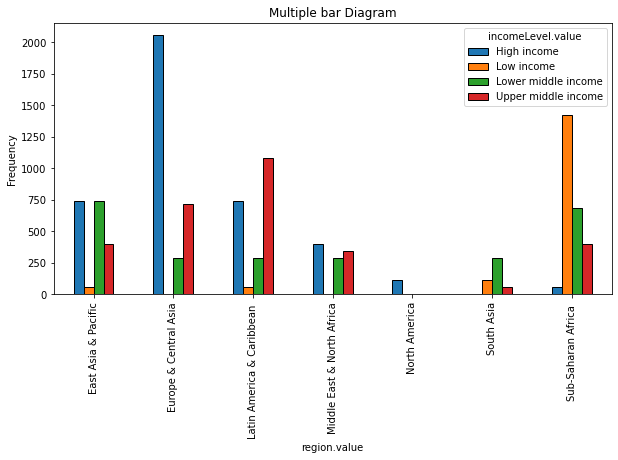

In [22]:
df1.plot(kind = 'bar',figsize = (10,5),ylabel = 'Frequency',title = 'Multiple bar Diagram',edgecolor='black')

<AxesSubplot:title={'center':'Multiple bar Diagram'}, xlabel='incomeLevel.value', ylabel='Frequency'>

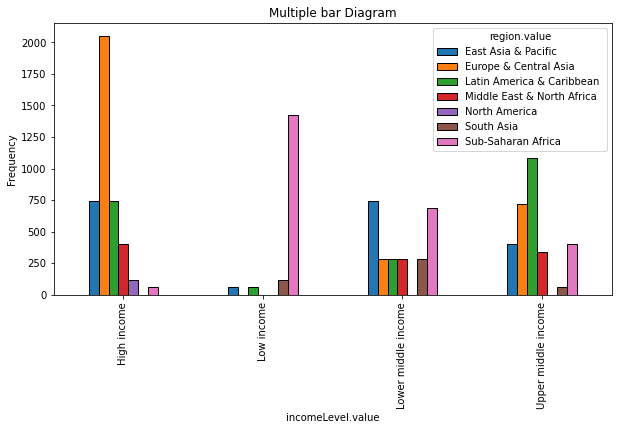

In [23]:
(df1.T).plot(kind = 'bar',figsize = (10,5),ylabel = 'Frequency',title = 'Multiple bar Diagram',edgecolor='black')

array([<AxesSubplot:ylabel='East Asia & Pacific'>,
       <AxesSubplot:ylabel='Europe & Central Asia'>,
       <AxesSubplot:ylabel='Latin America & Caribbean '>,
       <AxesSubplot:ylabel='Middle East & North Africa'>,
       <AxesSubplot:ylabel='North America'>,
       <AxesSubplot:ylabel='South Asia'>,
       <AxesSubplot:ylabel='Sub-Saharan Africa '>], dtype=object)

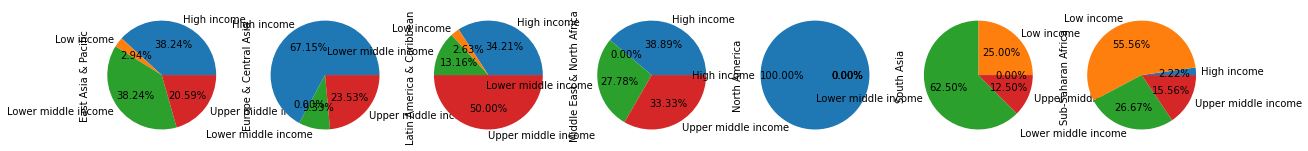

In [24]:
(df1.T).plot(subplots = True,kind = 'pie',legend = False,figsize = (20,10),autopct='%1.2f%%')

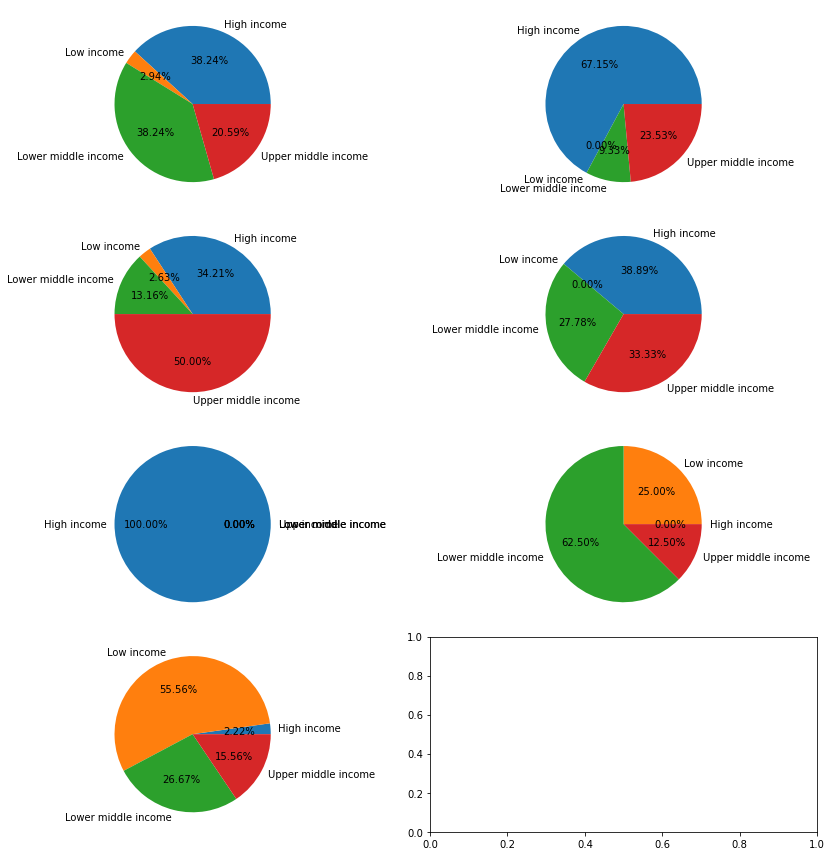

In [25]:
fig, axes = plt.subplots(4,2, figsize=(12, 12))
for i in range(len(df1.index)):
    plt.subplot(4,2,i+1)
    plt.pie(df1.iloc[i],labels=df1.columns,autopct='%1.2f%%')
plt.tight_layout()   

### 3.	Find summary of data representing column-wise missing cases and represent the same by appropriate chart.

In [26]:
#Showing null values in columns
na = data.isna().sum()
na

year                             0
country.name                     0
life.expectancy               1468
fertility.rate                1447
population                     273
GDP.per.capita.Current.USD    3088
region.value                     0
incomeLevel.value                0
dtype: int64

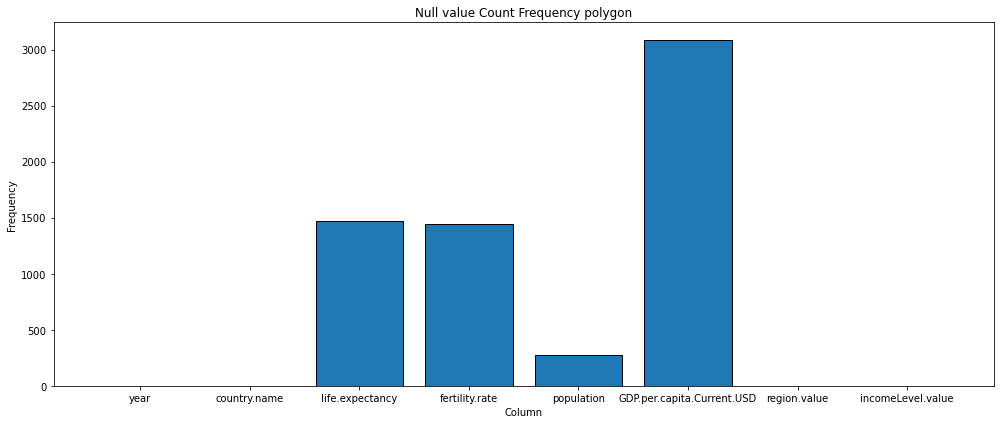

In [27]:
plt.figure(figsize=(14,6))
plt.bar(na.index,na.values,edgecolor='black')
plt.xlabel('Column')
plt.ylabel('Frequency')
plt.title('Null value Count Frequency polygon')
plt.tight_layout()

The points having y-value greater than 0 are the number of null values in that column

### 4.	Find mean of ‘life.expectancy’ for Japan, India, China, Cuba and Denmark. Represent this data using Barplot.

In [28]:
Country = 'Japan India China Cuba Denmark'.split()
df1_groupby = df.groupby('country.name').mean()['life.expectancy'][Country]
df1_groupby

country.name
Japan      77.180452
India      56.173533
China      65.652496
Cuba       73.559795
Denmark    75.248088
Name: life.expectancy, dtype: float64

Text(0, 0.5, 'Average life expectancy')

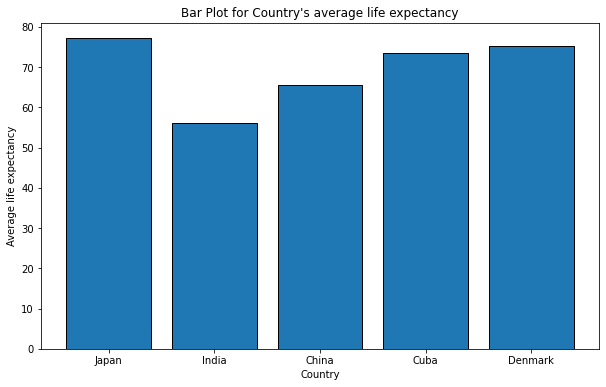

In [29]:
plt.figure(figsize=(10,6))
plt.bar(height = df1_groupby.values,x = df1_groupby.index,edgecolor='black')
plt.title("Bar Plot for Country's average life expectancy" )
plt.xlabel('Country')
plt.ylabel('Average life expectancy')

In [30]:
l=[]   #empty list
for i in Country:
    l.append(df[df['country.name']==i])    #append each country in list
df1 = pd.concat(l[0:])    #concat each list element in dataframe
df1.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
5358,1982,Japan,76.922927,1.77,118449000.0,9428.874650,East Asia & Pacific,High income
5359,2012,Japan,83.096098,1.41,127561489.0,46701.008000,East Asia & Pacific,High income
5360,1966,Japan,70.986585,1.58,99790000.0,1058.503561,East Asia & Pacific,High income
5361,1961,Japan,68.310000,2.05,94943000.0,563.586760,East Asia & Pacific,High income
5362,1976,Japan,75.456829,1.85,112771000.0,5111.295149,East Asia & Pacific,High income


In [31]:
df1_groupby = df1.groupby('country.name').mean()['life.expectancy']
df1_groupby

country.name
China      65.652496
Cuba       73.559795
Denmark    75.248088
India      56.173533
Japan      77.180452
Name: life.expectancy, dtype: float64

Text(0, 0.5, 'Average life expectancy')

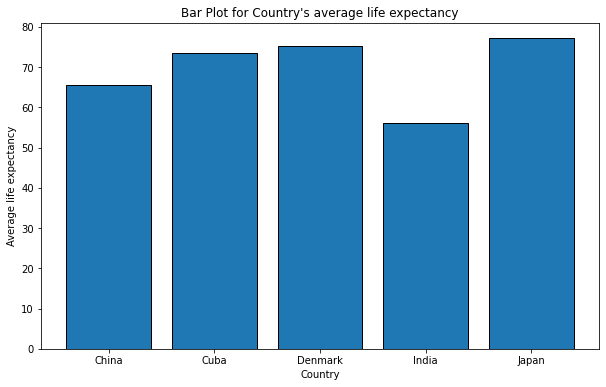

In [32]:
plt.figure(figsize=(10,6))
plt.bar(height = df1_groupby.values,x = df1_groupby.index,edgecolor='black')
plt.title("Bar Plot for Country's average life expectancy" )
plt.xlabel('Country')
plt.ylabel('Average life expectancy')

Japan has highest life expectancy and India has lowest among these five countries

### 5.	Draw histogram for 
* a.	life.expectancy

<AxesSubplot:title={'center':'Histogram for Life Expenctancy'}, ylabel='Frequency'>

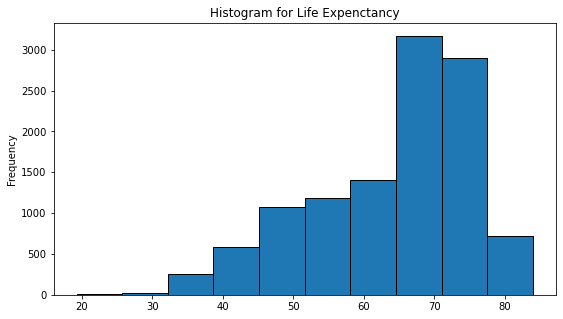

In [33]:
df['life.expectancy'].plot(kind='hist', xlabel = 'Life expectancy', title = 'Histogram for Life Expenctancy',edgecolor='black' ,figsize = (9,5))

The Life expectancy is negatively skewwed distribution

* b.	life.expectancy of incomeLevel= High income

In [34]:
d1 = df[df['incomeLevel.value'] == 'High income']['life.expectancy']
d1

0        74.291974
1        74.291974
2        74.291974
3        74.291974
4        74.291974
           ...    
11145    71.021122
11146    71.021122
11147    71.021122
11148    71.021122
11149    71.021122
Name: life.expectancy, Length: 4104, dtype: float64

Text(0.5, 1.0, 'Histogram for Life Expenctancy of High income people')

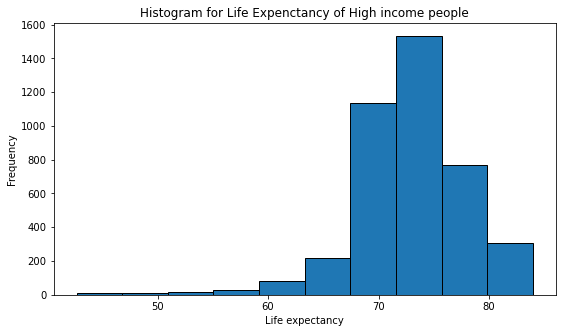

In [35]:
plt.figure(figsize = (9,5))
plt.hist(d1,edgecolor='black') 
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.title('Histogram for Life Expenctancy of High income people')

The Life expectancy of High income people is negatively skewwed distribution.

* c.	fertility.rate of incomeLevel = Low income

In [36]:
d2 = df[df['incomeLevel.value'] == 'Low income']['fertility.rate']
d2

57       7.450
58       7.460
59       7.137
60       7.450
61       7.450
         ...  
11031    6.379
11032    6.685
11033    6.465
11034    6.791
11035    6.504
Name: fertility.rate, Length: 1653, dtype: float64

Text(0.5, 1.0, 'Histogram for Fertility Rate of Low income people')

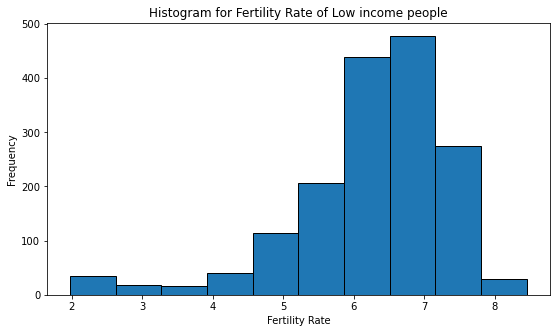

In [37]:
plt.figure(figsize = (9,5))
plt.hist(d2,edgecolor='black') 
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.title('Histogram for Fertility Rate of Low income people')

The Fertility Rate of Low income people is negatively skewwed distribution.

* d.	population of region = Europe & Central Asia

In [38]:
d3 = df[df['region.value'] == 'Europe & Central Asia']['population']
d3

0          64147.0
1          31781.0
2          42704.0
3          74783.0
4          24279.0
           ...    
11259    1308000.0
11260    1812771.0
11261    1135000.0
11262    2059000.0
11263    1818117.0
Name: population, Length: 3056, dtype: float64

In [39]:
d3.min(),d3.max()

(13414.0, 148689000.0)

Text(0.5, 1.0, 'Histogram for population of Europe & Central Asia')

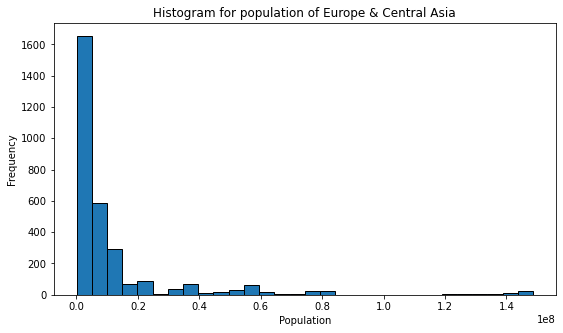

In [40]:
plt.figure(figsize = (9,5))
plt.hist(d3,bins=30,edgecolor='black') 
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram for population of Europe & Central Asia')

A lot of values lie in range (0.0,0.2) 1e8

### 6.	Draw density plot for 
* a.	GDP.per.capita.Current.USD


<AxesSubplot:title={'center':'Density plot for GDP per capita Current USD'}, ylabel='Density'>

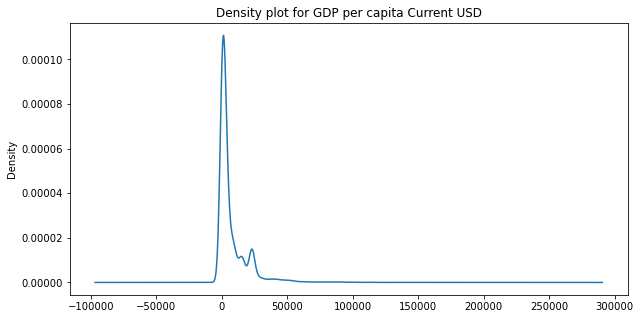

In [41]:
df['GDP.per.capita.Current.USD'].plot(kind = 'kde',title = 'Density plot for GDP per capita Current USD' ,figsize = (10,5))

* b.	GDP.per.capita.Current.USD of country = Japan

<AxesSubplot:title={'center':'Density plot for GDP per capita Current USD of Japan'}, ylabel='Density'>

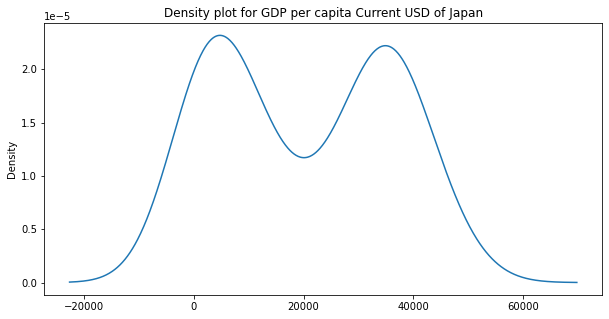

In [42]:
df[df['country.name'] == 'Japan']['GDP.per.capita.Current.USD'].plot(kind = 'kde',title = 'Density plot for GDP per capita Current USD of Japan' ,figsize = (10,5))

GDP in Japan has bimodal distribution.

* c.	GDP.per.capita.Current.USD of region = South Asia

<AxesSubplot:title={'center':'Density plot for GDP per capita Current USD of region South Asia'}, ylabel='Density'>

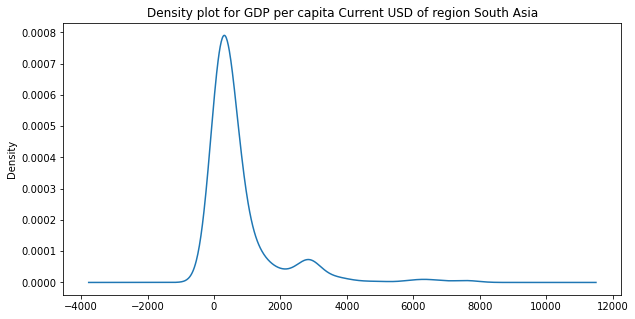

In [43]:
df[df['region.value'] == 'South Asia']['GDP.per.capita.Current.USD'].plot(kind = 'kde',title = 'Density plot for GDP per capita Current USD of region South Asia' ,figsize = (10,5))

* d.	GDP.per.capita.Current.USD of incomeLevel= High income


<AxesSubplot:title={'center':'Density plot for GDP per capita Current USD of High level income people'}, ylabel='Density'>

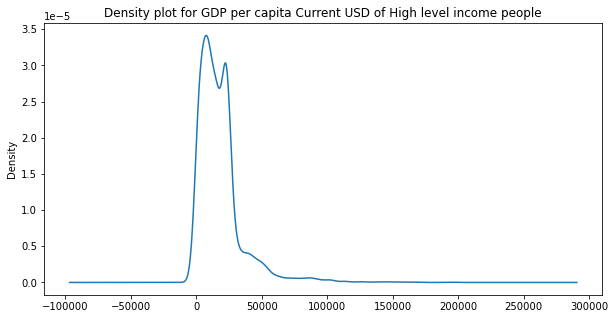

In [44]:
df[df['incomeLevel.value'] == 'High income']['GDP.per.capita.Current.USD'].plot(kind = 'kde',title = 'Density plot for GDP per capita Current USD of High level income people' ,figsize = (10,5))

### 7.	Draw boxplot for 
a.	life.expectancy of region= Sub-Saharan Africa

In [45]:
df['region.value'].value_counts()

Europe & Central Asia         3056
Sub-Saharan Africa            2565
Latin America & Caribbean     2166
East Asia & Pacific           1938
Middle East & North Africa    1026
South Asia                     456
North America                  114
Name: region.value, dtype: int64

<AxesSubplot:title={'center':'Box plot for life expectancy of Sub-Saharan Africa'}>

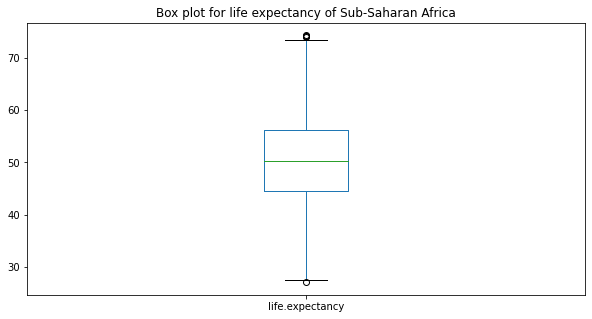

In [46]:
l1 = df[df['region.value'] == 'Sub-Saharan Africa ']['life.expectancy']
l1.plot(kind = 'box',title = 'Box plot for life expectancy of Sub-Saharan Africa',figsize = (10,5))

The distribution for life expectancy of Sub-Saharan Africa is symmetric.

b.	fertility.rate of incomeLevel = Low income and High income

In [47]:
l = df[df['incomeLevel.value'] == ('Low income')]
h = df[df['incomeLevel.value'] == ('High income')]

In [48]:
l2 = pd.concat([l,h])
l2.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
57,1960,Afghanistan,32.328512,7.450,8994793.0,59.787681,South Asia,Low income
58,1986,Afghanistan,46.426951,7.460,11438949.0,239.980961,South Asia,Low income
59,2003,Afghanistan,56.235293,7.137,22507368.0,203.651041,South Asia,Low income
60,1974,Afghanistan,38.560902,7.450,12315553.0,175.027098,South Asia,Low income
61,1961,Afghanistan,32.777439,7.450,9164945.0,59.890037,South Asia,Low income


<AxesSubplot:xlabel='incomeLevel.value', ylabel='fertility.rate'>

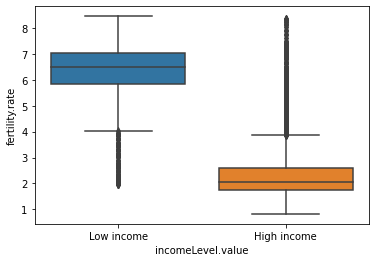

In [49]:
sns.boxplot(y = l2['fertility.rate'],x = l2['incomeLevel.value'])

The fertility rate of high income level is positively skewwed.There are so many extreme values above.
The fertility rate of low income level is negatively skewwed. There are so many extreme values below.

c.	GDP.per.capita.Current.USD of income = Upper middle income

In [50]:
l3 = df[df['incomeLevel.value'] == ('Upper middle income')]
l3['GDP.per.capita.Current.USD']#.plot(kind = 'box',xlabel = 'Upper middle income',title = 'Box plot for GDP per capita of Upper middle income people',figsize = (8,5))

171      1098.425463
172      4094.358832
173      3321.285297
174      3321.285297
175      3005.012903
            ...     
11316    1476.973213
11317    3728.333992
11318    3183.149769
11319    5668.386771
11320    2705.780204
Name: GDP.per.capita.Current.USD, Length: 2999, dtype: float64

<AxesSubplot:xlabel='incomeLevel.value', ylabel='GDP.per.capita.Current.USD'>

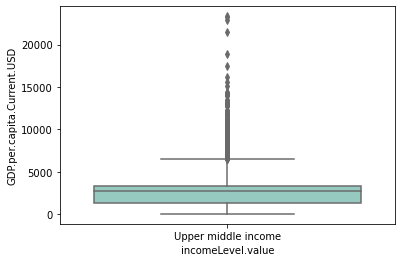

In [51]:
sns.boxplot(x = l3['incomeLevel.value'],y = l3['GDP.per.capita.Current.USD'],palette='Set3') 

The upper middle income level is negatively skewwed.There are so many outliers in upper values.

d.	population of region = East Asia & Pacific

In [52]:
l4 = df[df['region.value'] == 'East Asia & Pacific']
l4.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
399,2016,American Samoa,66.422056,3.466699,1.624081e+08,2641.700185,East Asia & Pacific,Upper middle income
400,1971,American Samoa,66.422056,3.466699,2.791600e+04,2641.700185,East Asia & Pacific,Upper middle income
401,1998,American Samoa,66.422056,3.466699,5.589900e+04,2641.700185,East Asia & Pacific,Upper middle income
402,1974,American Samoa,66.422056,3.466699,2.949100e+04,2641.700185,East Asia & Pacific,Upper middle income
403,1984,American Samoa,66.422056,3.466699,3.768700e+04,2641.700185,East Asia & Pacific,Upper middle income


<AxesSubplot:xlabel='region.value', ylabel='population'>

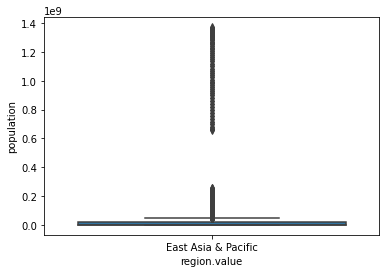

In [53]:
sns.boxplot(x = l4['region.value'],y = l4['population'])

There are so many outliers having upper values

### 8.	Draw scatterplot for
a.	life.expectancy and GDP.per.capita.Current.USD

<AxesSubplot:xlabel='life.expectancy', ylabel='GDP.per.capita.Current.USD'>

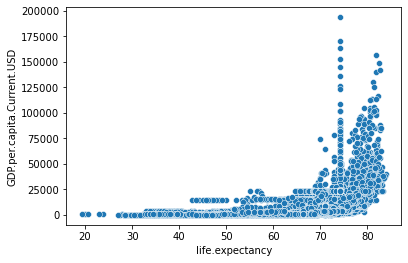

In [54]:
sns.scatterplot(x = df['life.expectancy'],y = df['GDP.per.capita.Current.USD'])

b.	life.expectancy and GDP.per.capita.Current.USD of region = Latin America & Caribbean

In [55]:
s1 = df[df['region.value'] == 'Latin America & Caribbean ']
s1.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
114,1971,Antigua and Barbuda,65.862024,3.517,66338.0,8758.949360,Latin America & Caribbean,High income
115,1984,Antigua and Barbuda,69.670463,2.098,66863.0,2595.024274,Latin America & Caribbean,High income
116,1992,Antigua and Barbuda,71.634707,2.096,63434.0,6680.375870,Latin America & Caribbean,High income
117,1970,Antigua and Barbuda,65.529341,3.684,65369.0,8758.949360,Latin America & Caribbean,High income
118,1989,Antigua and Barbuda,70.922829,2.058,61967.0,6025.847582,Latin America & Caribbean,High income


<AxesSubplot:xlabel='life.expectancy', ylabel='GDP.per.capita.Current.USD'>

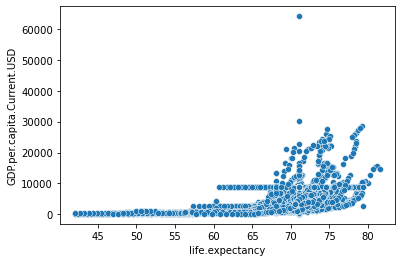

In [56]:
sns.scatterplot(x = s1['life.expectancy'],y = s1['GDP.per.capita.Current.USD'])

There seems to be no correlation between GDP and life expectancy.

c.	life.expectancy and GDP.per.capita.Current.USD of income = Upper middle income

In [57]:
s2 = df[df['incomeLevel.value'] == 'Upper middle income']
s2.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
171,1999,Albania,73.793390,2.249,3108778.0,1098.425463,Europe & Central Asia,Upper middle income
172,2010,Albania,77.036951,1.663,2913021.0,4094.358832,Europe & Central Asia,Upper middle income
173,1977,Albania,69.456171,3.966,2513546.0,3321.285297,Europe & Central Asia,Upper middle income
174,1976,Albania,69.115512,4.099,2458526.0,3321.285297,Europe & Central Asia,Upper middle income
175,2006,Albania,76.286122,1.668,2992547.0,3005.012903,Europe & Central Asia,Upper middle income


<AxesSubplot:xlabel='life.expectancy', ylabel='GDP.per.capita.Current.USD'>

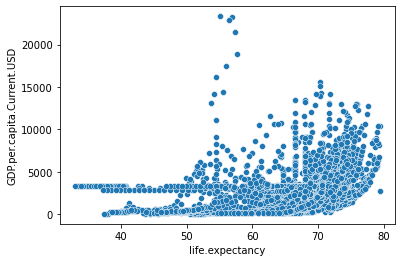

In [58]:
sns.scatterplot(x = s2['life.expectancy'], y = s2['GDP.per.capita.Current.USD'])

There seems to be no correlation between GDP and life expectancy.

d.	fertility.rate and life.expectancy of country = India

In [59]:
s3 = df[df['country.name'] == 'India']
s3.head()

,year,country.name,life.expectancy,fertility.rate,population,GDP.per.capita.Current.USD,region.value,incomeLevel.value
4902,2015,India,58.216190,4.629113,1.311051e+09,1581.588913,South Asia,Lower middle income
4903,2009,India,66.102634,2.687000,1.214182e+09,1124.519446,South Asia,Lower middle income
4904,2012,India,67.289878,2.510000,1.263590e+09,1444.266598,South Asia,Lower middle income
4905,1966,India,45.018512,5.795000,5.084029e+08,91.796882,South Asia,Lower middle income
4906,1989,India,57.473049,4.132000,8.527362e+08,353.255489,South Asia,Lower middle income


<AxesSubplot:xlabel='fertility.rate', ylabel='life.expectancy'>

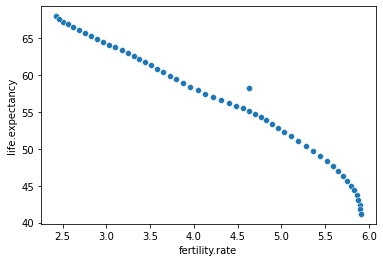

In [60]:
sns.scatterplot(x = s3['fertility.rate'],y = s3['life.expectancy'])

Life expectancy is inversely proportional to fertility rate.